# TFS GRIP APR


# Data Science and Business Analytics

# N.Anvika

Task 1:Prediction using supervised ML

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading dataset

In [2]:
student_info = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
student_info.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
student_info.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


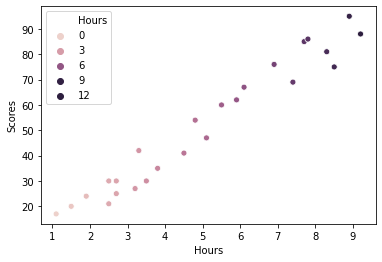

In [5]:
sns.scatterplot(x = student_info.Hours, y = student_info.Scores ,hue = student_info.Hours)

verifying whether the scores and hours are correlated or not

In [6]:
student_info.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


As we can see coreralation b/w hours and scores is 0.97 i.e almost near to 1

Hence correlated

# Building  Linear model plot

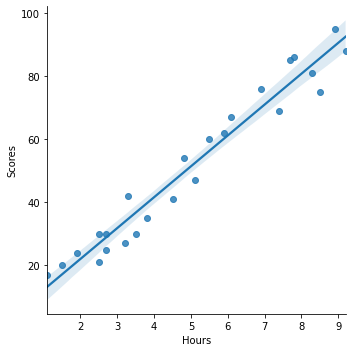

In [7]:
sns.lmplot(x='Hours', y='Scores', data=student_info)

# Testing and Training Data

In [8]:
# Setting variables x , y to the hours and scores of student_info
X = student_info.iloc[:,:-1].values
y = student_info.iloc[:,1].values

In [15]:
#Now split the data into training and tests
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

# Training the model

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print("Trained")

Trained


In [18]:
print('Coeffients: \n', model.coef_)

Coeffients: 
 [[9.57292199]]


# Plotting REgression Line

Now we have to Predict test data using predict method

In [38]:
predictions = model.predict(X_test)

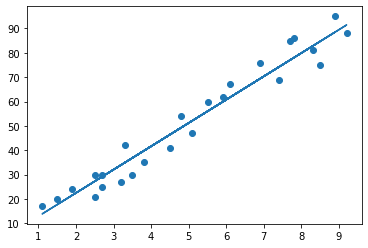

In [30]:
slop = model.coef_
intercept = model.intercept_
line = slop * X + intercept
plt.scatter(X, y)
plt.plot(X, line)

creating a scatterplot of real test values on x-axis and  predicted values on y-axis

Text(0, 0.5, 'Predicted Y')

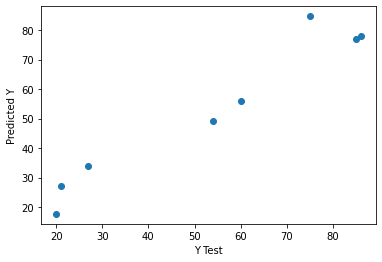

In [29]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [44]:
# checking accuracy of model
from sklearn import metrics
from sklearn.metrics import r2_score
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2_score:', r2_score(y_test, predictions)*100, "%")

RMSE: 6.641087469911337
r2_score: 93.50694990312648 %


In [47]:
study_hour = pd.DataFrame(data={9.25}, columns=['Hours'])
student_score = model.predict(study_hour)
student_score

array([[91.89006591]])

#  If a student study for 9.25 hours per day then predicted score he would get 91.8%